In [1]:
import numpy as np
!pip install tweepy

In [2]:
# Import the required libraries.
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Make the graphs prettier
pd.set_option('display.mpl_style', 'default')

In [9]:
consumerKey = 'XXOhFwy82NRv10vq0HAgUQ6WW'
consumerSecret = 'fHEY8mirRPgGL2zK4pMjKtQXQh9iYvhko8VLSrXzk2EGFDKjkt'

#Use tweepy.OAuthHandler to create an authentication using the given key and secret
auth = tweepy.OAuthHandler(consumer_key=consumerKey, 
    consumer_secret=consumerSecret)

#Connect to the Twitter API using the authentication
api = tweepy.API(auth)

In [10]:
#Perform a basic search query where we search for the '#flu' in the tweets
result = api.search(q='%23flu') #%23 is used to specify '#'

# Print the number of items returned by the search query to verify our query ran. Its 15 by default
len(result)

15

In [12]:
print(result[0])

Status(contributors=None, truncated=False, text=u"RT @MicrobesInfect: It's official - the #flu has arrived in France and the epidemic will not spare anyone because of the strains currently\u2026", is_quote_status=True, in_reply_to_status_id=None, id=943002718284800000, favorite_count=0, _api=<tweepy.api.API object at 0x11ba87cd0>, source=u'Twitter for iPhone', quoted_status_id=942802979769511936, _json={u'contributors': None, u'truncated': False, u'text': u"RT @MicrobesInfect: It's official - the #flu has arrived in France and the epidemic will not spare anyone because of the strains currently\u2026", u'is_quote_status': True, u'in_reply_to_status_id': None, u'id': 943002718284800000, u'favorite_count': 0, u'entities': {u'symbols': [], u'user_mentions': [{u'id': 313054802, u'indices': [3, 18], u'id_str': u'313054802', u'screen_name': u'MicrobesInfect', u'name': u'Microbes&Infection'}], u'hashtags': [{u'indices': [40, 44], u'text': u'flu'}], u'urls': []}, u'quoted_status_id': 9428029797

In [14]:
results = []

#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23flu').items(5000):
    results.append(tweet)

# Verify the number of items returned
print len(results)

4032


In [23]:
# Create a function to convert a given list of tweets into a Pandas DataFrame.
# The DataFrame will consist of only the values, which I think might be useful for analysis...


def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)


In [24]:
DataSet.head

<bound method DataFrame.head of                  tweetID                                          tweetText  \
0     943003224876953601  How the #flu kills: host-#pathogen interaction...   
1     943002718284800000  RT @MicrobesInfect: It's official - the #flu h...   
2     943002018414809094  Currently trying to find out if it is indeed p...   
3     943001917508202496  RT @WHOSEARO: #AntibioticResistance \n#antibio...   
4     943000870576209920  RT @Michell21078406: #coldandflu #besthealthre...   
5     943000830097088512  God, I have being sick #flu #breaktime #Monday...   
6     943000278621503488  RT @CDCFlu: #Flu activity is on the rise. Be s...   
7     943000015848574976  RT @WHOSEARO: #AntibioticResistance \n#antibio...   
8     942999695030288384  RT @MicrobesInfect: It's official - the #flu h...   
9     942999111275556864  RT @ADPoliceHQ: #أوقف_العدوى #الانفلونزا_الموس...   
10    942998522152013824  RT @Crof: US #flu activity jumps as new varian...   
11    94299821640822

In [25]:
DataSet.shape

(4032, 15)

In [26]:
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,943003224876953601,How the #flu kills: host-#pathogen interaction...,0,0,Twitter for Android,2017-12-19 06:21:03,749602900331102208,c_handschin,Christoph Handschin,2016-07-03 13:57:13,Professor @biozentrum @UniBasel_en . Intereste...,63,21,"Basel, Schweiz",Bern
1,943002718284800000,RT @MicrobesInfect: It's official - the #flu h...,5,0,Twitter for iPhone,2017-12-19 06:19:02,730848414611718144,Tess_blue815,Tess,2016-05-12 19:53:35,"nature, hiking, cycling, animal lover, science...",1412,487,,None
2,943002018414809094,Currently trying to find out if it is indeed p...,0,0,Twitter for iPhone,2017-12-19 06:16:15,26334880,Crumbelievable,Crum,2009-03-24 21:55:56,What is life?,75,104,Wherever the wind blows,Central Time (US & Canada)
3,943001917508202496,RT @WHOSEARO: #AntibioticResistance \n#antibio...,4,0,Twitter Web Client,2017-12-19 06:15:51,91089841,imJananatha,Jananatha | ජනනාථ™,2009-11-19 11:55:50,IT & Communication Officer #SocialMedia #SriLa...,2036,661,"Colombo, Rajagiriya",Sri Jayawardenepura
4,943000870576209920,RT @Michell21078406: #coldandflu #besthealthre...,1,0,Twitter for Android,2017-12-19 06:11:42,752340333111832576,FitSportsclub,FoodFit & BedRelax,2016-07-11 03:14:48,"Food Health and Fitness,Balance What You Eat D...",1013,669,,Pacific Time (US & Canada)


In [28]:
# 'None' is treated as null here, so I'll remove all the records having 'None' in their 'userTimezone' column
DataSet = DataSet[DataSet.userTimezone.notnull()]

# Let's also check how many records are we left with now
len(DataSet)

2849

In [29]:
# Count the number of tweets in each time zone and get the first 10
tzs = DataSet['userTimezone'].value_counts()[:10]
print tzs

Eastern Time (US & Canada)     617
Pacific Time (US & Canada)     518
Brasilia                       466
Central Time (US & Canada)     298
London                         248
Mountain Time (US & Canada)     62
Quito                           58
Amsterdam                       50
Arizona                         43
Atlantic Time (Canada)          41
Name: userTimezone, dtype: int64


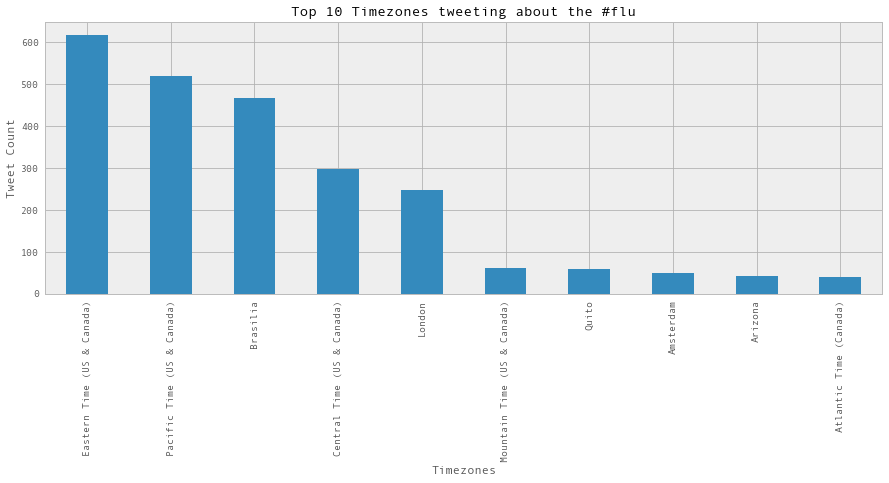

In [30]:

# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (15, 5)

# Plot the Time Zone data as a bar-graph
tzs.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about the #flu')